In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

%matplotlib inline


In [2]:
# iris dataset downloaded from standard sklearn dataset libraries
iris_dataset = sklearn.datasets.load_iris()


# Extrated only two features from iris dataset (sum of every two features)
# the reason is simplified visualisation
X = np.array(list(map(lambda x: [x[0] + x[1], x[2] + x[3]], iris_dataset['data'])))
Y = iris_dataset['target']

"Shape of dataset", X.shape, Y.shape

('Shape of dataset', (150, 2), (150,))

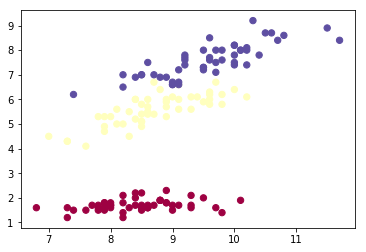

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.Spectral);

In [4]:
def class_to_vec(v):
    """
    Converts vector of labels into matrix. Each row of matrix contains boolean marks of labels
    i.e. [0,1,2] -> [[1,0,0],[0,1,0],[0,0,1]]
    
    v -- vector of labels (may only contain integer values from range 0..n, where n is a number of classes)
    """
    V = np.zeros((v.shape[0], max(v) + 1))
    for (row, label) in zip(V, v):
        row[label] = 1.0
    return V.T

class_to_vec(np.array([0,1,4,2,4]))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1.]])

/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


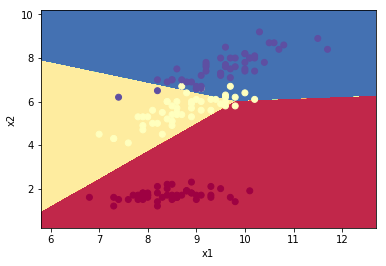

In [5]:
# Logistic regression try
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    """
    Plots learning data with model using scatter plot.
    
    model -- predict function (sample -> label)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

# Prototype of logistic regression model for plot_decision_boudary function testing
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X, Y);

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

In [6]:
def layers_sizes(Xx, Yy, hidden_layers):
    """
    X -- input dataset
    Y -- labels
    hidden_layers -- vector of amounts of neurons in each hidden layer, 
                     i.e. [3,4,6] means 3 hidden layers with 3, 4 and 6 neurons accordingly
    
    Returns: array of layer sizes i.e. [34, 3, 4, 6, 2] (above example with 34 features and 2 labels dataset)
    """
    
    return [Xx.shape[1]] + hidden_layers + [Yy.shape[0]]

layers_sizes(np.array([[1,2,3],[4,5,6]]), class_to_vec(np.array([0,2])), [3,4,5])
# expected [3,3,4,5,3]

[3, 3, 4, 5, 3]

In [7]:
# force reproductible random function behaviour
np.random.seed(1)


def initialize_nn(layers_sizes):
    """
    layers_sizes -- array of sizes of each layes in neural network
    
    Returns: Complete neural network in matrix notation.
             Array of weights and biases for each layer. 
             Please note that the first layer takes the raw input - does not contain weights and biases.
    """
    result = []
    prev_size = layers_sizes[0]
    
    for idx, size in enumerate(layers_sizes[1:]):
        weights = np.random.randn(size, prev_size) * 0.01
        biases = np.zeros(shape=(size, 1))
        result += [{'weights': weights, 'biases': biases, 'layer_no': idx + 1}]
        prev_size = size
    
    return result

initialize_nn([2, 3, 4])
# expected neural network parameters constructed from two layers 
# (the first one (layer no 0) is fake - only pass input data further to the next layer)

[{'weights': array([[ 0.01624345, -0.00611756],
         [-0.00528172, -0.01072969],
         [ 0.00865408, -0.02301539]]), 'biases': array([[0.],
         [0.],
         [0.]]), 'layer_no': 1},
 {'weights': array([[ 0.01744812, -0.00761207,  0.00319039],
         [-0.0024937 ,  0.01462108, -0.02060141],
         [-0.00322417, -0.00384054,  0.01133769],
         [-0.01099891, -0.00172428, -0.00877858]]), 'biases': array([[0.],
         [0.],
         [0.],
         [0.]]), 'layer_no': 2}]

In [8]:
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm


def forward_propagation(Xx, Nn, activation='sigmoid'):
    """
    Xx -- input dataset
    Nn -- Neural network parameters: array of dictionaries with weights and bayases (neural network)
    activation -- activation function used for calculation of single neuron output
    
    Returns result of forward propagation (no_of_classes, no_of_examples) and cache with results of each layer
    """
    # input dataset is the output of the first layer
    A = Xx.T
    cache = [A]
    
    for layer in Nn:
        Z = np.dot(layer['weights'], A) + layer['biases']
        if activation == 'sigmoid':
            A = sigmoid(Z)
        else:
            A = np.tanh(Z)
        cache += [A]
        
    return A, cache

X_test = np.array([[1,2,3],[1,2,3]])
Y_test = np.array([[0,1],[1,0]])
sizes = layers_sizes(X_test, Y_test, [6])
layers = initialize_nn(sizes)
R, cache = forward_propagation(X_test, layers)
R, cache
# expected result: array 3x150 (3 classes, 150 examples)

(array([[0.500579  , 0.500579  ],
        [0.50333551, 0.50333551]]), [array([[1, 1],
         [2, 2],
         [3, 3]]), array([[0.49476516, 0.49476516],
         [0.51113663, 0.51113663],
         [0.49791184, 0.49791184],
         [0.5002988 , 0.5002988 ],
         [0.49113421, 0.49113421],
         [0.494436  , 0.494436  ]]), array([[0.500579  , 0.500579  ],
         [0.50333551, 0.50333551]])])

In [9]:
def compute_cost(R, Y):
    """
    Arguments:
    R -- results of forward propagation, shape: (no_of_classes, no_of_examples)
    Y -- labels of exmples
    """
    
    m = Y.shape[1] # number of examples
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(R), Y) + np.multiply((1 - Y), np.log(1 - R))
    cost = - np.sum(logprobs) / m    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    
    return cost

medium = compute_cost(
    np.array([[.1,.2,.3],
              [.4,.1,.4]]), 
    np.array([[0.,1.,0.],
              [1.,0.,1.]]))

big = compute_cost(
    np.array([[.1,.6,.3],
              [.8,.1,.6]]), 
    np.array([[1.,0.,1.],
              [0.,1.,0.]]))

small = compute_cost(
    np.array([[.1,.9,.1],
              [.9,.1,.9]]), 
    np.array([[0.,1.,0.],
              [1.,0.,1.]]))

assert small < medium < big
small, medium, big

(0.2107210313156526, 1.336471783812265, 3.083720788832146)

In [10]:
def backward_propagation(Nn, cache, X, Y):
    """    
    Arguments:
    Nn -- list of matrices containing layers weights and biases
    cache -- list of vectors containing output of every layer
    X -- input dataset
    Y -- dataset labels
    
    Returns:
    gradients -- list of gradients for each layer
    """
    m = X.shape[0]
    # dZ - error vector (delta)
    # calculate elta of the last layer (final output)
    dZ = list(reversed(cache))[0] - Y
    gradients = []
    
    for (layer, A) in zip(list(reversed(Nn)), list(reversed(cache))[1:]):
        dW = (1/m) * np.dot(dZ, A.T)
        dB = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        gradients = [{'dW': dW,'dB': dB}] + gradients
        dZ = np.multiply(np.dot(layer['weights'].T, dZ), 1 - np.power(A, 2))

    return gradients

# example for 2x2x1 neural network
backward_propagation(
    # nn with 2 layers
    [{'weights': np.array([[1,2],[3,4]]), 'biases': np.zeros([2,1])}, 
     {'weights': np.array([[1,2]]), 'biases': np.zeros([1,1])}],
    # three vectors with output (the very first one is input dataset)
    [np.array([[1],[2]]), np.array([[1],[2]]), np.array([[3]])],
    # X
    np.array([[1,2]]),
    # Y
    np.array([[1]])
)
# should return two matrices with gradients corresponding to weights matrices sizes

[{'dW': array([[  0.,   0.],
         [-12., -24.]]), 'dB': array([[  0.],
         [-12.]])}, {'dW': array([[2., 4.]]), 'dB': array([[2.]])}]

In [12]:
def update_parameters(Nn, gradients, learning_rate=1.2):
    """
    Updates neural network weights and biases based on gradients calculated in back-propagation process
    
    Nn -- neural network model
    gradients -- output of backpropagation
    """
    result_Nn = []
    for (layer, grad) in zip(Nn, gradients):
        layer['weights'] = layer['weights'] - learning_rate * grad['dW']
        layer['biases'] = layer['biases'] - learning_rate * grad['dB']
        result_Nn += [layer]
    return result_Nn

update_parameters(
    [{'weights': np.array([[1,2],[3,4]]), 'biases': np.zeros([2,1])}, 
     {'weights': np.array([[1,2]]), 'biases': np.zeros([1,1])}],
    [{'dW': np.array([[2,3],[4,5]]), 'dB': np.zeros([2,1])}, 
     {'dW': np.array([[1,2]]), 'dB': np.zeros([1,1])}],
    1)

[{'weights': array([[-1, -1],
         [-1, -1]]), 'biases': array([[0.],
         [0.]])}, {'weights': array([[0, 0]]), 'biases': array([[0.]])}]

In [19]:
def mlp_network(X, Y, iterations = 1000, hidden_layers=[10], activation='sigmoid', learning_rate=1.2, threshold=None):
    """
    Initializes and learns neural network model based on input dataset and parameters
    X -- input dataset
    Y -- labels of input dataset
    
    Returns:
    (W, partials)
    W -- weights of optimal neural network
    partials -- 10 partial results of not-yet-fully-learned network
    costs -- array of costs from each iteration
    """
    
    sizes = layers_sizes(X, Y, hidden_layers)
    W = initialize_nn(sizes)
    partials = []
    costs = []

    for i in range(iterations):
        A, cache = forward_propagation(X, W)
        
        costs += [compute_cost(A, Y)]
                
        if (i+1) % int(iterations/10) == 1:
            print('cost', i, compute_cost(A, Y))
            partials += [W]
            
        if (not threshold == None and threshold > compute_cost(A, Y)):
            break
        
        gradients = backward_propagation(W, cache, X, Y)
        
        W = update_parameters(W, gradients, learning_rate)
    
    print('cost', i, compute_cost(A, Y))
    return W, partials, costs

optimal_W, partials, _ = mlp_network(X, class_to_vec(Y), 1000, [6])

cost 0 2.0810562674854127
cost 100 0.626431912251923
cost 200 0.6706659613245506
cost 300 0.49258303312791263
cost 400 0.41957089007254655
cost 500 0.3312831591887177
cost 600 0.3006659627664778
cost 700 0.25508814981614736
cost 800 0.3248123026759466
cost 900 0.2352469511351607
cost 999 0.28318853488215723


/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [14]:
def predict(X, Nn):
    """
    X -- samples to predict
    Nn -- neural network model
    """
    results = []
    R = forward_propagation(X, Nn)[0]
    for col in R.T:
        results += [col.argmax()]
    return np.array(results)

predict(np.array([[3,4]]), optimal_W)

array([2])

In [20]:
optimal_W, partials, _ = mlp_network(X, class_to_vec(Y), 100000, [20,10], threshold=0.10, learning_rate=0.05)
plot_decision_boundary(lambda x: predict(x, optimal_W), X.T, Y.T)

cost 0 2.0794797030402186


/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


cost 10000 0.4530801220944886
cost 20000 0.27885241450260273
cost 30000 0.22849254857337933
cost 40000 0.22547735660112314
cost 50000 0.19470549884440946
cost 60000 0.16161357228386314
cost 70000 0.15566758326091445
cost 80000 0.15530917936850963
cost 90000 0.1957556150070157
cost 99999 0.15523922223600997


ValueError: too many values to unpack (expected 2)

cost 0 2.08525865046157


/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


cost 5000 0.1870362594503093
cost 10000 0.10219222193416819
cost 15000 0.18620256926892217
cost 20000 0.3199078802020129
cost 25000 0.09528669851688275
cost 30000 0.09544251579041159
cost 35000 0.09498010464544557
cost 40000 0.0947137004918459
cost 45000 0.10125907807379608
cost 49999 0.09228914387529445


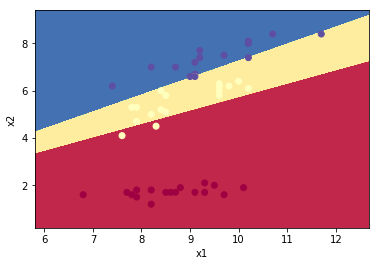

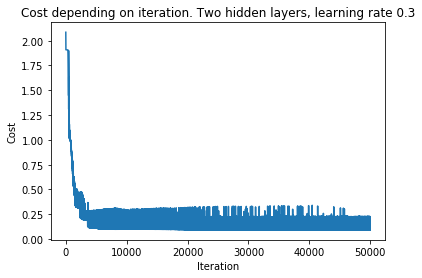

In [41]:
from sklearn.model_selection import train_test_split

def plot_cost(costs, info):
    plt.figure();
    plt.title("Cost depending on iteration. {}".format(info))
    plt.ylabel("Cost")
    plt.xlabel("Iteration")
    plt.plot(costs);

#iris divided into test and train


nn,_,cost = mlp_network(X_train, class_to_vec(y_train), 50000, [10, 10], learning_rate=0.3)
plot_decision_boundary(lambda x: predict(x, nn), X_test.T, y_test.T)
plot_cost(cost, "Two hidden layers, learning rate 0.3")

In [34]:
X_train.shape, X_test.shape

((100, 2), (50, 2))

In [16]:
def normalize(M):
    m = M - M.mean(axis=0)
    return m / np.abs(m).max(axis=0)

cost 0 2.0746237170010695


/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


cost 5000 0.10794164643132267
cost 10000 0.10082650827373954
cost 15000 0.1023268531339339
cost 20000 0.3634599527836428
cost 25000 0.09201393890359479
cost 30000 0.15661118455025572
cost 35000 0.07913710228761993
cost 40000 0.07927275628041523
cost 45000 0.08365325617824305
cost 49999 0.10410184972357125


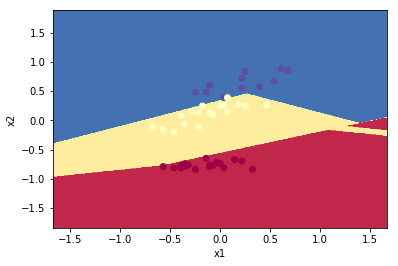

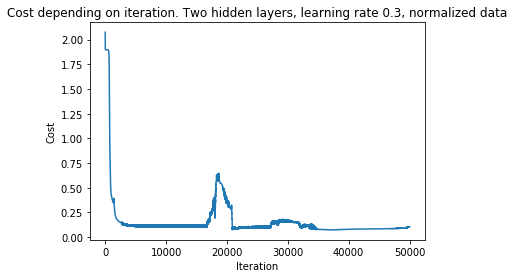

In [44]:
#iris dataset normalized
Xn = normalize(X)
Yn = Y

#iris divided into test and train
X_train, X_test, y_train, y_test = train_test_split(Xn, Yn, test_size=0.33)


nn,_,cost = mlp_network(X_train, class_to_vec(y_train), 50000, [10, 10], learning_rate=0.3)
plot_decision_boundary(lambda x: predict(x, nn), X_test.T, y_test.T)
plot_cost(cost, "Two hidden layers, learning rate 0.3, normalized data")

cost 0 1.3863043020483605


/Users/mk/repos/inshorts-nlp/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


cost 10000 0.29589079308426375
cost 10509 0.24988812313088624


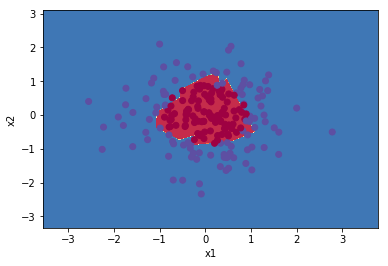

In [18]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2,  shuffle=True, random_state=None)
    return gaussian_quantiles

Xg, Yg = load_extra_datasets()
plt.scatter(Xg.T[0, :], Xg.T[1, :], c=Yg, s=40, cmap=plt.cm.Spectral);

nn,_ = mlp_network(Xg, class_to_vec(Yg), 100000, [20,10], learning_rate=0.6, threshold=0.25)
plot_decision_boundary(lambda x: predict(x, nn), Xg.T, Yg.T)

In [ ]:
# digits recognition
digits = sklearn.datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print("Training dataset shapes", X_train.shape, y_train.shape)

nn,_ = mlp_network(X, class_to_vec(Y), 1000, [20,10], learning_rate=0.6, threshold=0.25)

passed = 0
for x, y in zip(X_test, y_test.T):
    if predict(x, nn)[0] == y:
        passed += 1
        
print(passed, "/", y_test.shape[0])

In [ ]:

print(class_to_vec(digits.target).shape)